# Image Contouring

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Type <class 'numpy.ndarray'>  size: (768, 1024, 3)


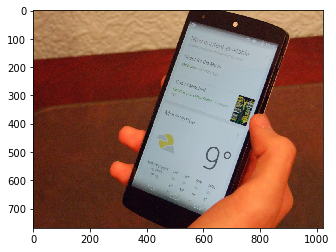

In [80]:
image = cv2.cvtColor(cv2.imread("nexus5.jpg"), cv2.COLOR_BGR2RGB)
print("Type", type(image), " size:", image.shape)

plt.imshow(image)

### Edge detection

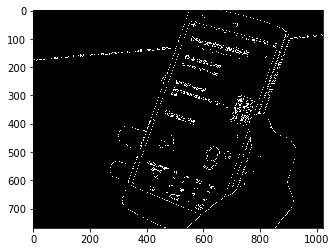

In [83]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

edges = cv2.Canny(gray, 80, 100)

plt.imshow(edges, cmap="gray")

It is not filtering very well, we will try to transform to HSV and apply a different filter

### Find lines using Hough transform

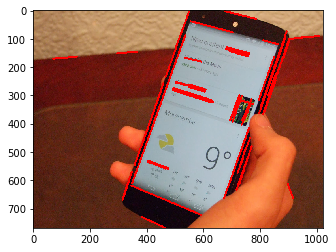

In [85]:
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 50
max_line_gap = 5

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

line_image = np.copy(image)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)
        
plt.imshow(line_image)